# Introducción a Python

Universidad Autónoma Metropolitana - Unidad Iztapalapa (UAM-I)

Maestría en Matemáticas Aplicadas e Industriales (MCMAI)

Taller de Modelado Matemático II - Parte I

Trimestre 25-P

Profesor: Dr. Alejandro Román Vásquez

Alumno: Alan Badillo Salas

In [3]:
import keras

In [13]:
import pandas
import numpy

D = pandas.DataFrame(numpy.array([
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 0],
]), columns=["x1", "x2", "y"])

D.head()

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [14]:
X = D.values[:, 0:2]

Y = D.values[:, 2]

X.shape, Y.shape

((4, 2), (4,))

In [30]:
D[D["y"] == 0]

,x1,x2,y
0,0,0,0
3,1,1,0


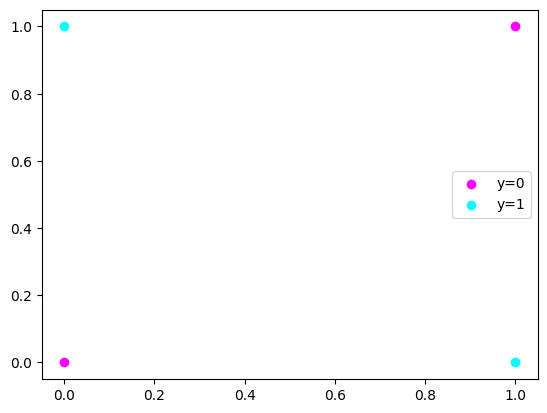

In [59]:
import matplotlib.pyplot as pyplot

for c in D["y"].unique():
    A = D[D["y"] == c]
    x1 = A.values[:, 0]
    x2 = A.values[:, 1]
    y = A.values[:, 2]
    pyplot.scatter(x1, x2, c={0: "magenta", 1: "cyan"}[c], label=f"y={c}")
pyplot.legend()
pyplot.show()

0 0 0
1 1 0
0 1 1
1 0 1


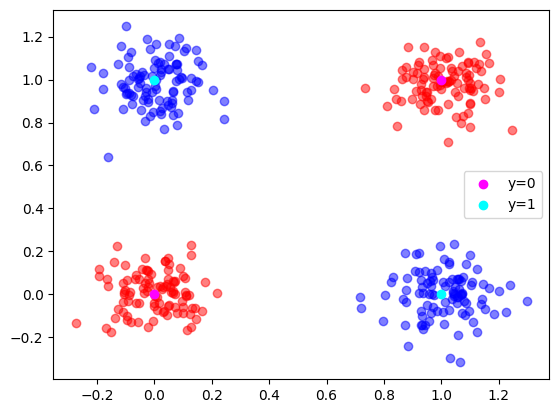

In [60]:
for c in D["y"].unique():
    A = D[D["y"] == c]
    x1 = A.values[:, 0]
    x2 = A.values[:, 1]
    y = A.values[:, 2]
    for x1i, x2i in zip(x1, x2):
        print(x1i, x2i, c)
        for j in range(100):
            x1j = numpy.random.normal(x1i, 0.1)
            x2j = numpy.random.normal(x2i, 0.1)
            pyplot.scatter([x1j], [x2j], c={0: "red", 1: "blue"}[c], alpha=0.5)    
    pyplot.scatter(x1, x2, c={0: "magenta", 1: "cyan"}[c], label=f"y={c}")
pyplot.legend()
pyplot.show()

In [19]:
D.groupby(["x1", "x2"]).sum().unstack()

y   
x2  0  1
x1      
0   0  1
1   1  0

<Axes: xlabel='None-x2', ylabel='x1'>

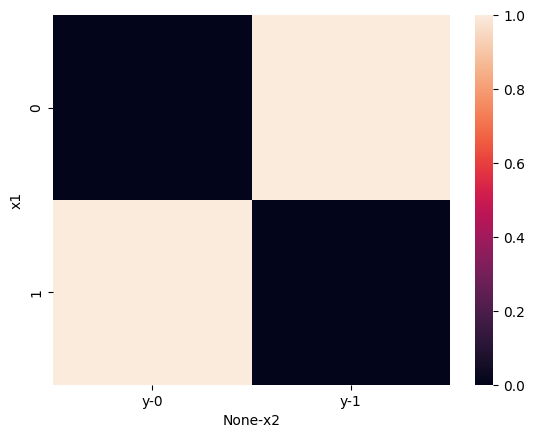

In [20]:
import seaborn

seaborn.heatmap(D.groupby(["x1", "x2"]).sum().unstack())

In [65]:
E = []

for c in D["y"].unique():
    A = D[D["y"] == c]
    x1 = A.values[:, 0]
    x2 = A.values[:, 1]
    y = A.values[:, 2]
    for x1i, x2i in zip(x1, x2):
        print(x1i, x2i, c)
        for j in range(100):
            x1j = numpy.random.normal(x1i, 0.1)
            x2j = numpy.random.normal(x2i, 0.1)
            E.append((x1j, x2j, x1j - x1i, x2j - x2i, c))
    E.append((x1i, x2i, 0, 0, c))

E = pandas.DataFrame(E, columns=["x1", "x2", "d1", "d2", "y"])

E.sample(10)

0 0 0
1 1 0
0 1 1
1 0 1


,x1,x2,d1,d2,y
366,0.891937,0.025763,-0.108063,0.025763,1
9,0.008993,0.000091,0.008993,0.000091,0
232,0.021436,1.041319,0.021436,0.041319,1
361,1.093107,0.033112,0.093107,0.033112,1
186,1.012018,1.097619,0.012018,0.097619,0
313,0.765653,0.056598,-0.234347,0.056598,1
258,-0.022250,1.189405,-0.022250,0.189405,1
169,0.945094,0.970446,-0.054906,-0.029554,0
255,-0.056632,1.123376,-0.056632,0.123376,1
384,1.197994,0.072705,0.197994,0.072705,1


In [66]:
X = E[["x1", "x2", "d1", "d2"]].values
Y = E["y"].values

X.shape, Y.shape

((402, 4), (402,))

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((301, 4), (101, 4), (301,), (101,))

In [92]:
from sklearn.svm import SVC

clf = SVC(kernel="rbf")

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

1.0

In [93]:
x1p = numpy.linspace(-1, 2, 10)
x2p = numpy.linspace(-1, 2, 10)
d1p = numpy.zeros(10)
d2p = numpy.zeros(10)

X1p, X2p, D1p, D2p = numpy.meshgrid(x1p, x2p, d1p, d2p)

X_grid = numpy.c_[X1p.ravel(), X2p.ravel(), D1p.ravel(), D2p.ravel()]

yp = clf.predict(X_grid)

yp

array([0, 0, 0, ..., 0, 0, 0])

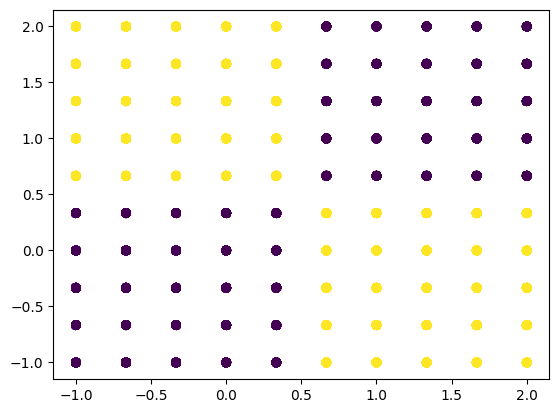

In [94]:
pyplot.scatter(X1p, X2p, c=yp)